In [35]:
import warnings
warnings.filterwarnings("ignore")
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [36]:
# Load CSV files into a DataFrames
df1 = pd.read_csv(r"C:\Users\user\GitHub Projects\brazil-real-estate-1.csv")
df2 = pd.read_csv(r"C:\Users\user\GitHub Projects\brazil-real-estate-2.csv")

In [37]:
# Drop null values from df1
df1.dropna(inplace=True)

# Clean "price_usd" column in df1
df1["price_usd"] = ( 
    df1["price_usd"]
    .str.replace("$", "")
    .str.replace(",","")
    .astype("float")
)

# Split the "lat-lon" column ind df1 into separate "lat" and "lon" columns
df1[["lat", "lon"]] = (
    df1["lat-lon"]
    .str.split(",", expand=True)
    .astype("float")
)

# Extract the state name from the "place_with_parent_names" column in df1
df1["state"] = (
    df1["place_with_parent_names"]
    .str.split("|",expand=True)[2]
)

# Drop the "lat-lon" and "place_with_parent_names" columns from df1
df1.drop(columns=(["lat-lon","place_with_parent_names"]), inplace=True)

In [38]:
# Drop null values from df2
df2.dropna(inplace=True)

# Create "price_usd" column for df2 (3.19 reals to the dollar in 2015 and 2016)
df2["price_usd"] = (df2["price_brl"] / 3.19).round(2)

# Drop the "price_brl" column from d2
df2.drop(columns=("price_brl"),inplace=True)

In [39]:
# Concatenate df1 and df2
df = pd.concat([df1, df2])

In [40]:
fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="lon",
    center={"lat": -14.2, "lon": -51.9},  # Map will be centered on Brazil
    width=600,
    height=600,
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

In [41]:
summary_stats = df[["area_m2", "price_usd"]].describe()
summary_stats

,area_m2,price_usd
count,22844.000000,22844.000000
mean,115.020224,194987.315515
std,47.742932,103617.682979
min,53.000000,74892.340000
25%,76.000000,113898.770000
50%,103.000000,165697.555000
75%,142.000000,246900.882500
max,252.000000,525659.720000


Text(0.5, 1.0, 'Distribution of Home Prices')

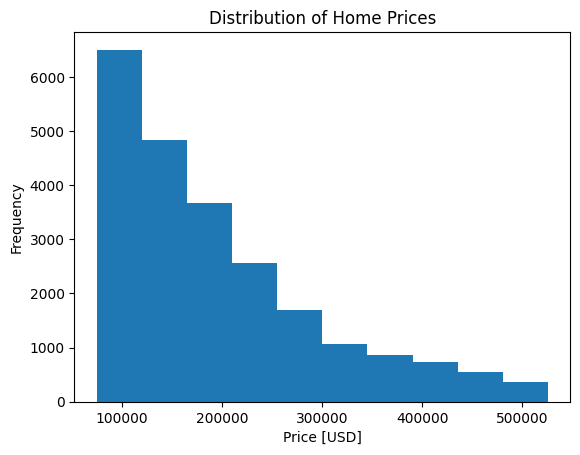

In [42]:
# Build histogram
plt.hist(df["price_usd"])


# Label axes
plt.xlabel("Price [USD]")
plt.ylabel("Frequency")

# Add title
plt.title("Distribution of Home Prices")


Text(0.5, 1.0, 'Distribution of Home Sizes')

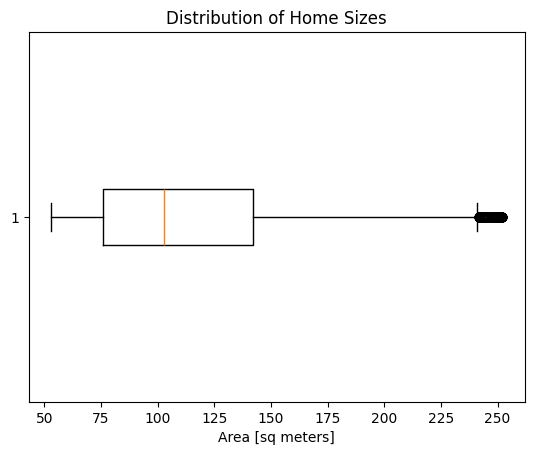

In [43]:
# Build box plot
plt.boxplot(df["area_m2"], vert=False)


# Label x-axis
plt.xlabel("Area [sq meters]")

# Add title
plt.title("Distribution of Home Sizes")

In [44]:
# Group by region and calculate the mean price
regional_price_avg = df.groupby("region")["price_usd"].mean().sort_values(ascending=False)

# Display the average prices by region
print(regional_price_avg)


region
Southeast       208996.762761
South           189012.345360
Northeast       185422.985482
North           181308.958188
Central-West    178596.283663
Name: price_usd, dtype: float64


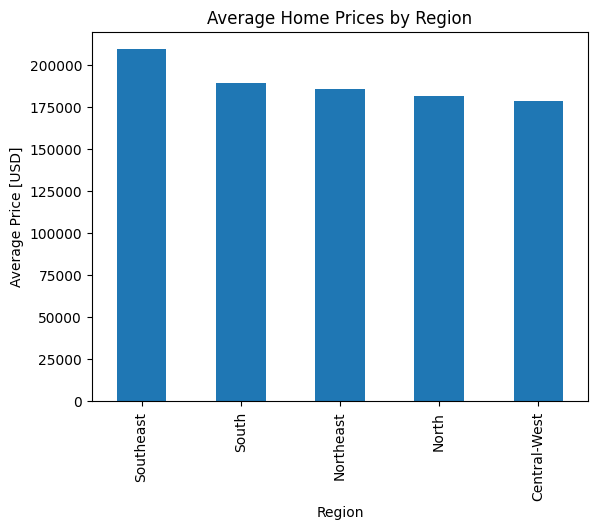

In [45]:
# Plot average prices by region
regional_price_avg.plot(kind='bar')

# Label axes and add title
plt.xlabel("Region")
plt.ylabel("Average Price [USD]")
plt.title("Average Home Prices by Region")

# Show the plot
plt.show()

In [46]:
# Filter for properties in the South region
south_df = df[df["region"] == "South"]

# Calculate correlation between home size and price
correlation = south_df["area_m2"].corr(south_df["price_usd"])
print(f"Correlation between home size and price in Southern Brazil: {correlation}")


Correlation between home size and price in Southern Brazil: 0.5316779420492636


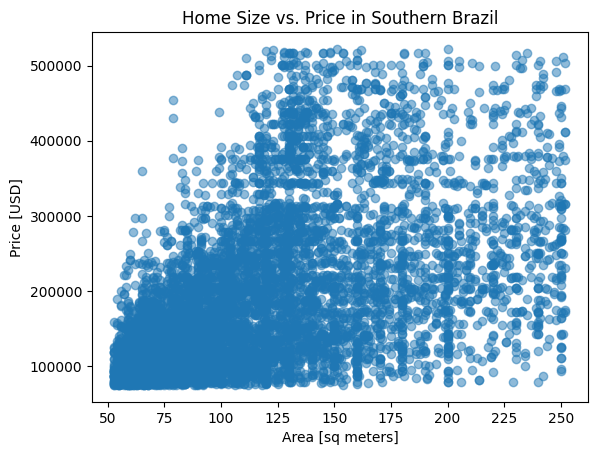

In [47]:
# Build scatter plot
plt.scatter(south_df["area_m2"], south_df["price_usd"], alpha=0.5)

# Label axes and add title
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Home Size vs. Price in Southern Brazil")

# Show the plot
plt.show()
